In [2]:
from pandas_datareader import data 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [7]:
data_source = 'kaggle'

if data_source == 'alphavantage':
    # Alpha Vantage API key
    with open('api_key.txt') as f:
        api_key = f.read().strip()
    # Define the stock symbol and the time period
    symbol = 'AAL'
    url_string = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize=full&apikey={api_key}&datatype=json'
    file_destination = f'{symbol}.json'

    if not os.path.exists(file_destination):
        # Download the data
        with urllib.request.urlopen(url_string, file_destination) as url:
            data = json.loads(url.read().decode())
            data = data['Time Series (Daily)']
            df = pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
            for date, values in data.items():
                date = dt.datetime.strptime(date, '%Y-%m-%d')
                row = [date.date(), float(values['1. open']), float(values['2. high']), float(values['3. low']), float(values['4. close']), int(values['6. volume'])]
                df.loc[-1,:] = row
                df.index = df.index + 1
        df.to_csv(file_destination)
    else:
        df = pd.read_csv(file_destination)
else:
    path = os.path.join("stocks/Stocks","hpq.us.txt")
    df = pd.read_csv(path, delimiter=',', usecols= ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])


                

In [8]:
df=df.sort_values('Date')
df.head()  

,Date,Open,High,Low,Close,Volume
0,1970-01-02,0.30627,0.30627,0.30627,0.30627,2441124
1,1970-01-05,0.30627,0.31768,0.30627,0.31385,6219848
2,1970-01-06,0.31385,0.31385,0.30996,0.30996,4447522
3,1970-01-07,0.31385,0.31385,0.31385,0.31385,1872638
4,1970-01-08,0.31385,0.31768,0.31385,0.31385,4280330


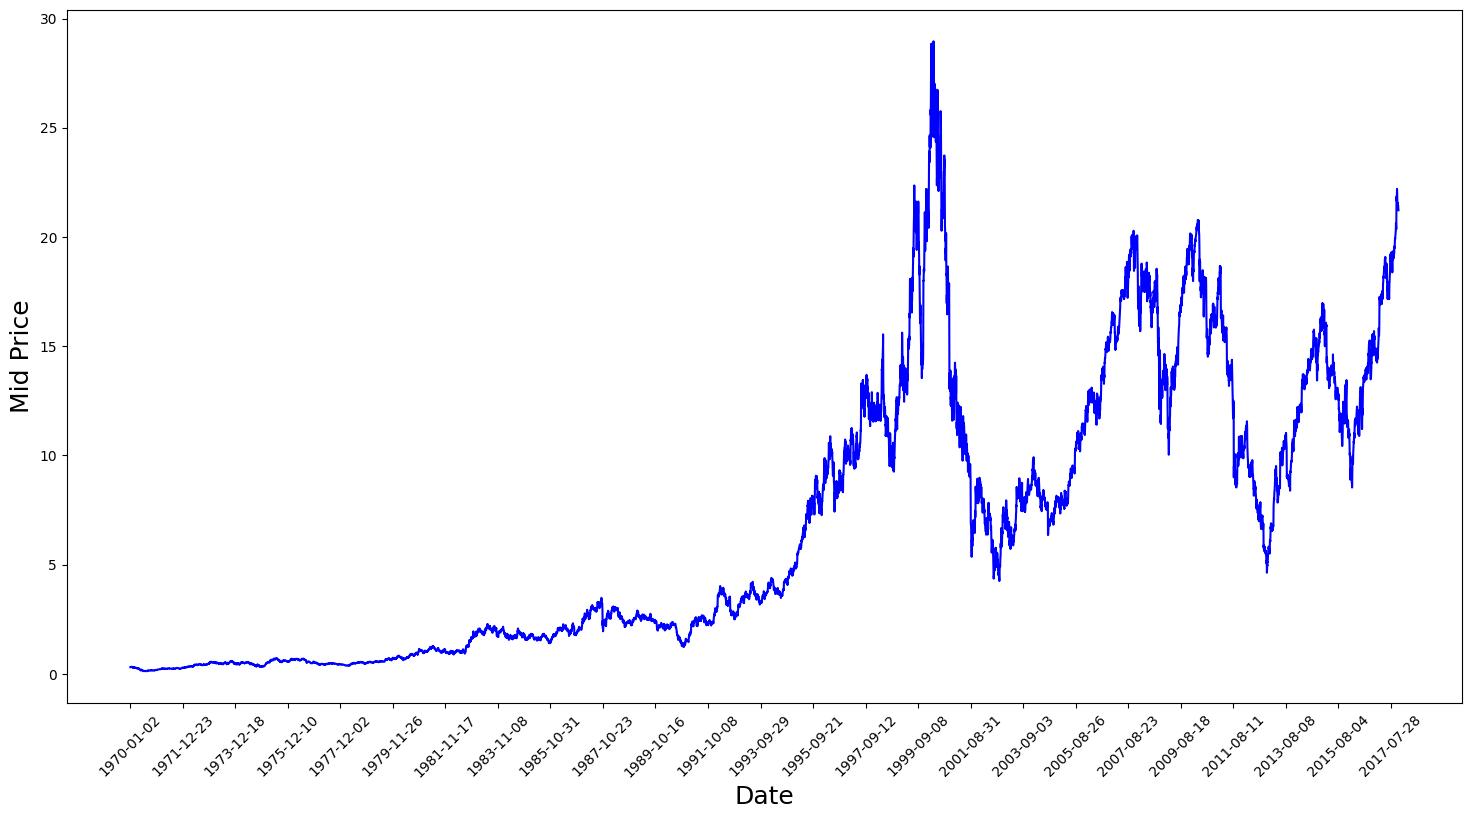

In [9]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]), (df['Low']+df['High'])/2, color='blue' )
plt.xticks(range(0, df.shape[0], 500), df['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.show()

In [ ]:
high_prices = df.loc[:,'High'].to_numpy()
low_prices = df.loc[:,'Low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0